In [1]:
# !pip install top2vec[sentence_encoders]
!pip install tensorflow tensorflow_hub tensorflow_text
!pip install top2vec

     |████████████████████████████████| 4.9 MB 924 kB/s 
     |████████████████████████████████| 497.5 MB 22 kB/s 
     |████████████████████████████████| 2.1 MB 37.8 MB/s 
     |████████████████████████████████| 462 kB 46.7 MB/s 
INFO: pip is looking at multiple versions of tensorflow-text to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 4.9 MB 35.9 MB/s 
     |████████████████████████████████| 4.9 MB 37.9 MB/s 
     |████████████████████████████████| 495.0 MB 25 kB/s 
     |████████████████████████████████| 463 kB 39.0 MB/s 
     |████████████████████████████████| 1.3 MB 36.9 MB/s 
     |████████████████████████████████| 14.5 MB 36.3 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: six
    Found existing installation: si

In [2]:
# import libraries
import os
from os.path import isfile, isdir, join
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
import time
from bs4 import BeautifulSoup
import re
from IPython.display import display
from zipfile import ZipFile
import pickle
import unicodedata
import pytz
from joblib import Parallel, delayed
import shutil
import random
import requests
import gc
import math

# !pip install top2vec
# !pip install top2vec[sentence_encoders]


!pip install numpy --upgrade
from top2vec import Top2Vec

  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
dask-cudf 21.8.3 requires cupy-cuda114, which is not installed.
cudf 21.8.3 requires cupy-cuda110, which is not installed.
beatrix-jupyterlab 3.1.1 requires google-cloud-bigquery-storage, which is not installed.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.6 which is incompatible.
tfx-bsl 1.3.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.14.0 which is incompatible.
tfx-bsl 1.3.0 requires numpy<1.20,>=1.16, but you have numpy 1.21.6 which is incompatible.
tfx-

In [3]:
# log
def log(msg):
    now = datetime.strftime(datetime.now(tz=pytz.timezone('Hongkong')), '%Y-%m-%d %H:%M:%S')
    print(f'[{now}] {msg}')
    
# pickle
def save_pkl(obj, filename):
    pickle.dump(obj, open(filename, 'wb'), protocol=pickle.HIGHEST_PROTOCOL)
    return
def load_pkl(filename):
    return pickle.load(open(filename, 'rb'))

def get_size(path='.'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
    return total_size

def dl_txt(txt):
    with open(f'text.txt', 'w') as f:
        f.write(txt)
        f.close()
    return

import signal
class TimeoutException(Exception):   # Custom exception class
    pass
def timeout_handler(signum, frame):   # Custom signal handler
    raise TimeoutException
signal.signal(signal.SIGALRM, timeout_handler)

<Handlers.SIG_DFL: 0>

# Top2Vec

In [4]:
# load documents (Item 1 - Business)
docs = load_pkl('../input/hkml-signal-extraction-pre/docs')
documents = [docs[cik]['item_1'] for cik in docs]
document_ids = list(docs)

# train model
model = Top2Vec(documents = documents, 
                embedding_model = 'universal-sentence-encoder',
                document_ids = document_ids,
                workers = -1)

2022-05-13 11:42:21,066 - top2vec - INFO - Pre-processing documents for training
2022-05-13 11:42:41,838 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-05-13 11:42:52.750870: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-05-13 11:42:52.769346: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-05-13 11:42:57,689

In [5]:
# CIK to topic mapping
doc_topics_ = model.get_documents_topics(doc_ids=document_ids)
doc_topics = pd.DataFrame({'cik':document_ids, 'topic':doc_topics_[0], 'topic_words':[', '.join(list(x)) for x in list(doc_topics_[2][:,:10])]})
doc_topics

cik  topic                                        topic_words
0    0000001800      5  pharmaceuticals, pfizer, patented, pharma, nov...
1    0000002488      0  manufactures, trademark, trademarks, exports, ...
2    0000002969      0  manufactures, trademark, trademarks, exports, ...
3    0000003673      1  refinery, refineries, pipelines, superfund, sh...
4    0000004127      0  manufactures, trademark, trademarks, exports, ...
..          ...    ...                                                ...
597  0001645590      3  saas, netapp, citrix, quickbooks, nasdaq, acce...
598  0001646383      3  saas, netapp, citrix, quickbooks, nasdaq, acce...
599  0001652044      3  saas, netapp, citrix, quickbooks, nasdaq, acce...
600  0001659166      0  manufactures, trademark, trademarks, exports, ...
601  0001678531      9  medicaid, medicare, hmo, deductibles, healthca...

[602 rows x 3 columns]

In [6]:
# number of topics
n_topic = model.get_num_topics()

# topic description
size, topic_num = model.get_topic_sizes()
topics = pd.DataFrame({'topic_num':topic_num, 'size':size})
topic_words, word_scores, topic_nums = model.get_topics(n_topic)
df = pd.DataFrame({'topic_num':topic_nums, 'topic_words':[', '.join(list(x)) for x in list(topic_words[:,:10])]})
topics = topics.merge(df, how='inner', on='topic_num')
display(topics)

topic_num  size                                        topic_words
0          0   186  manufactures, trademark, trademarks, exports, ...
1          1    73  refinery, refineries, pipelines, superfund, sh...
2          2    70  jpmorgan, reit, citigroup, etfs, fdic, schwab,...
3          3    60  saas, netapp, citrix, quickbooks, nasdaq, acce...
4          4    51  gaap, reit, amortization, accounting, deprecia...
5          5    49  pharmaceuticals, pfizer, patented, pharma, nov...
6          6    33  reit, leased, leasehold, gaap, amortization, l...
7          7    31  boeing, avionics, aerospace, cargo, aircraft, ...
8          8    28  fcc, twc, wireline, comcast, directv, subscrib...
9          9    21  medicaid, medicare, hmo, deductibles, healthca...

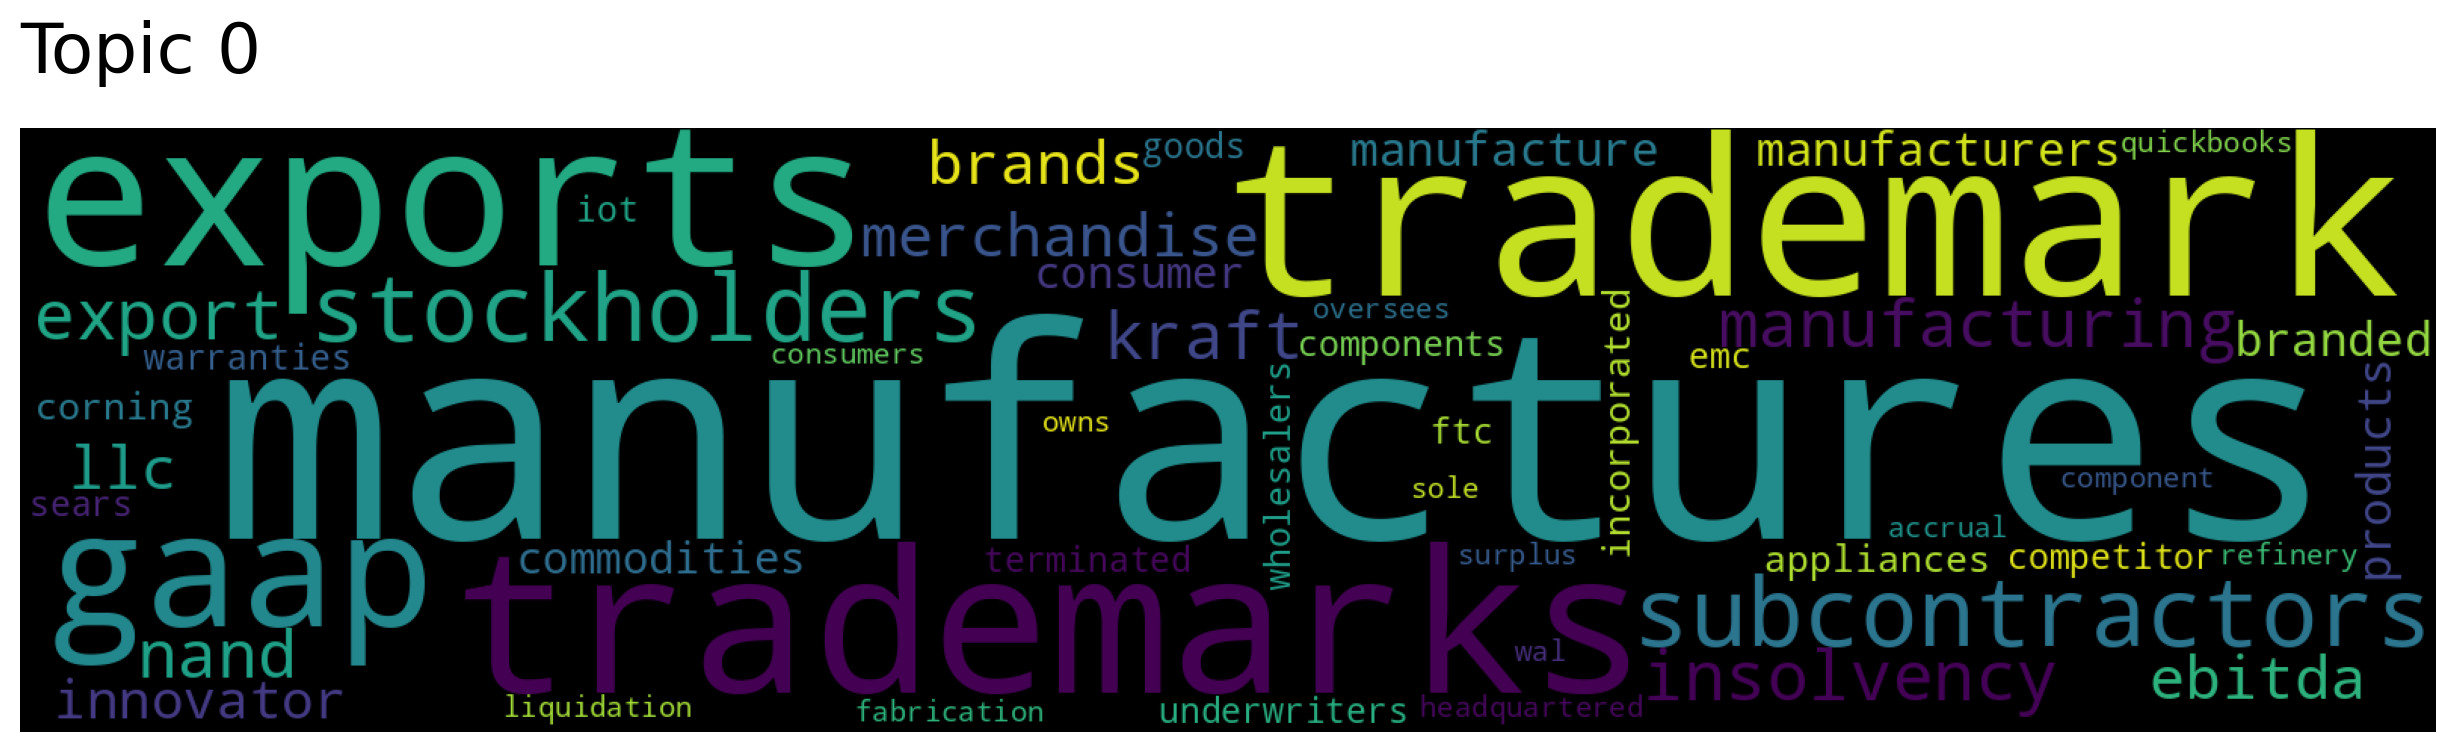

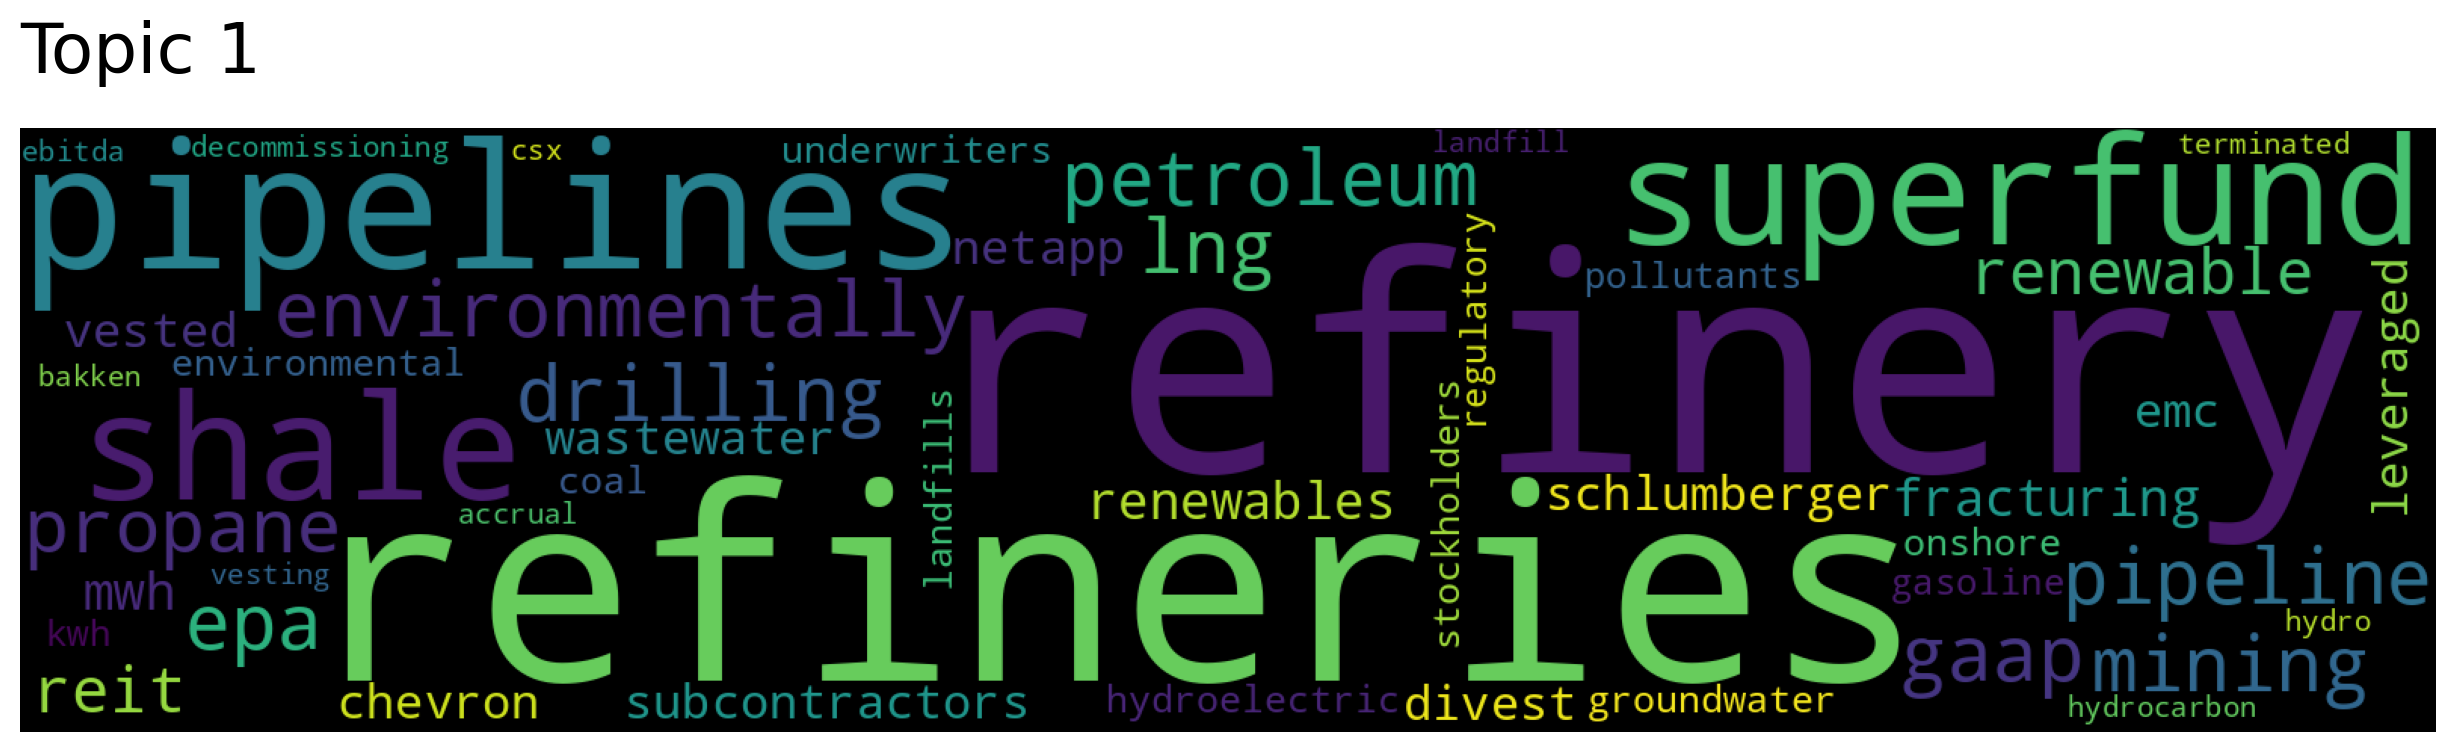

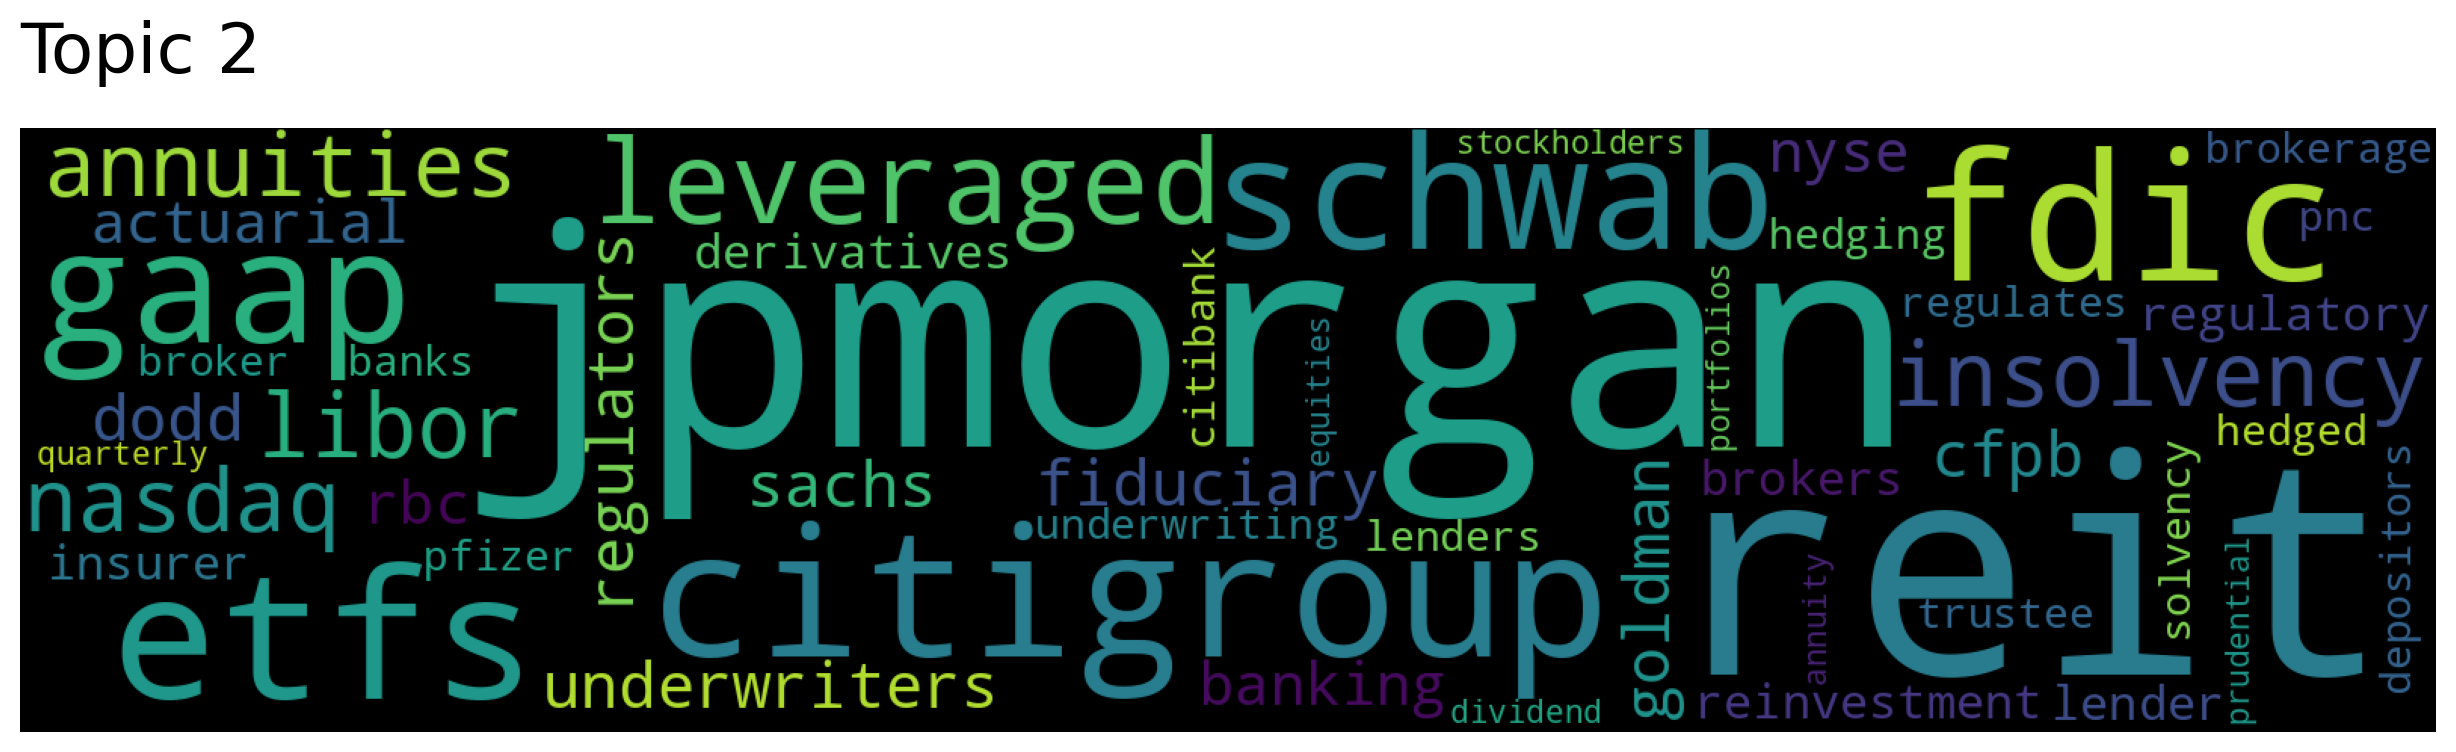

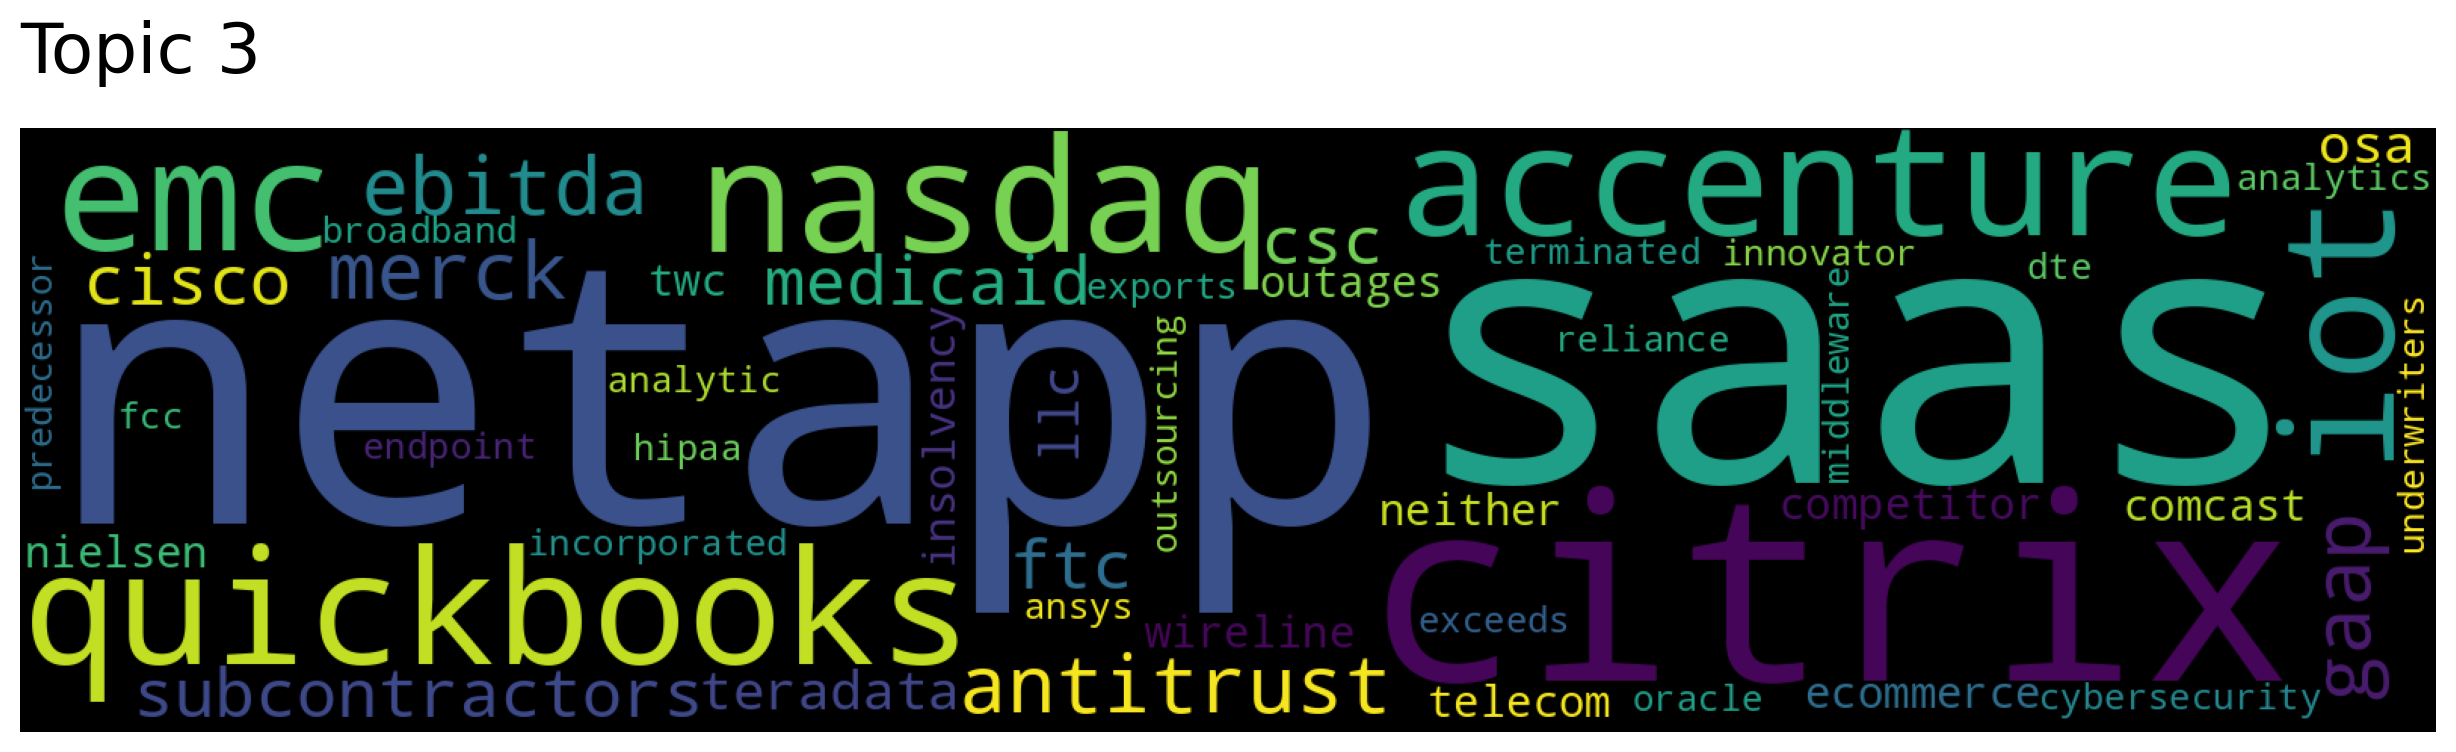

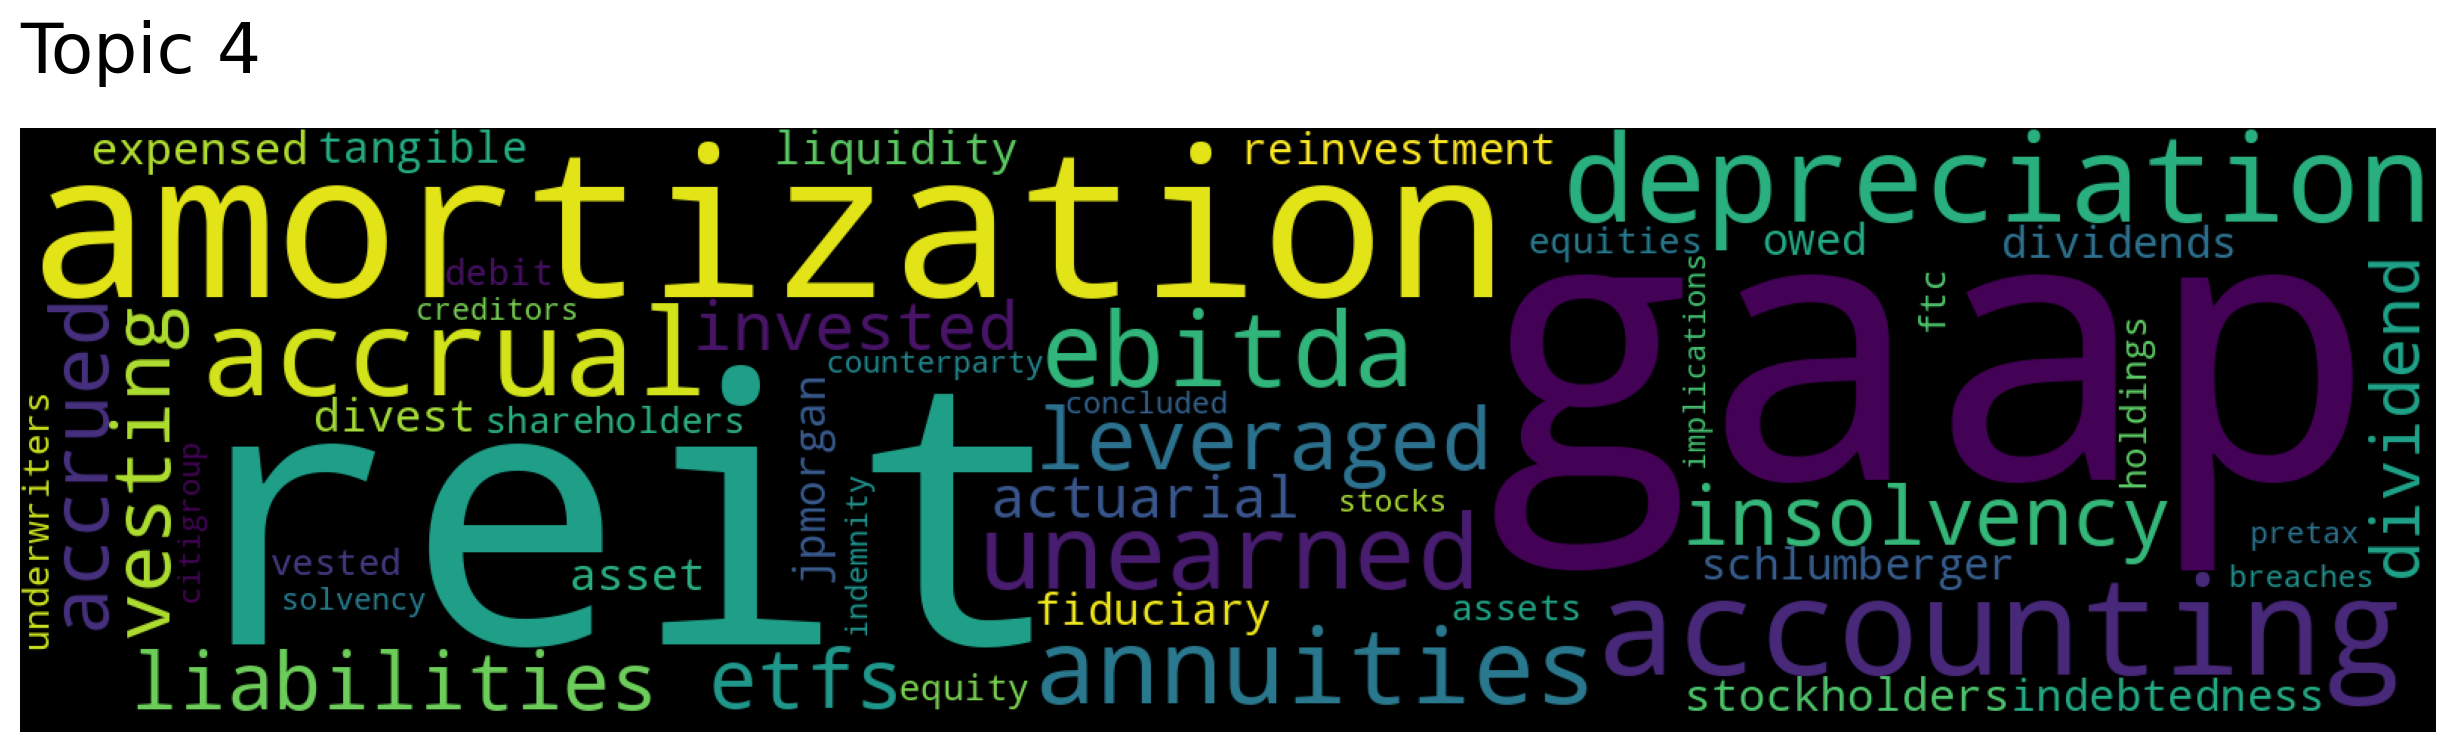

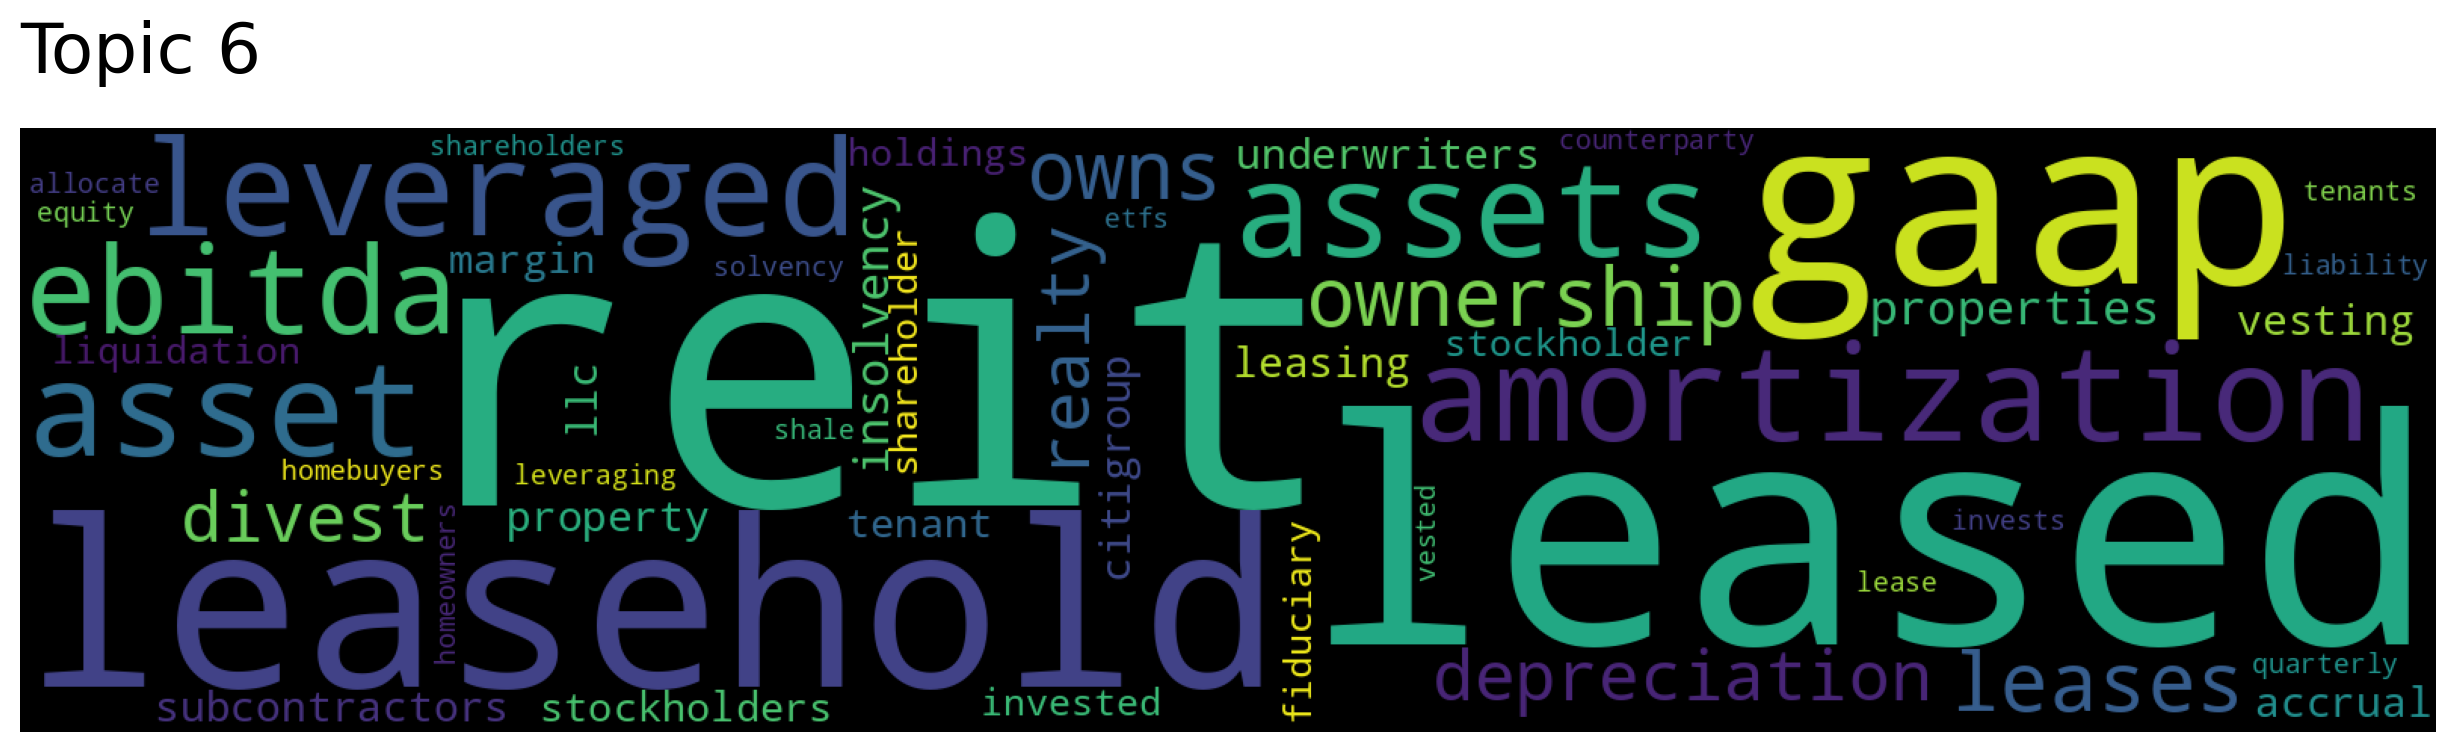

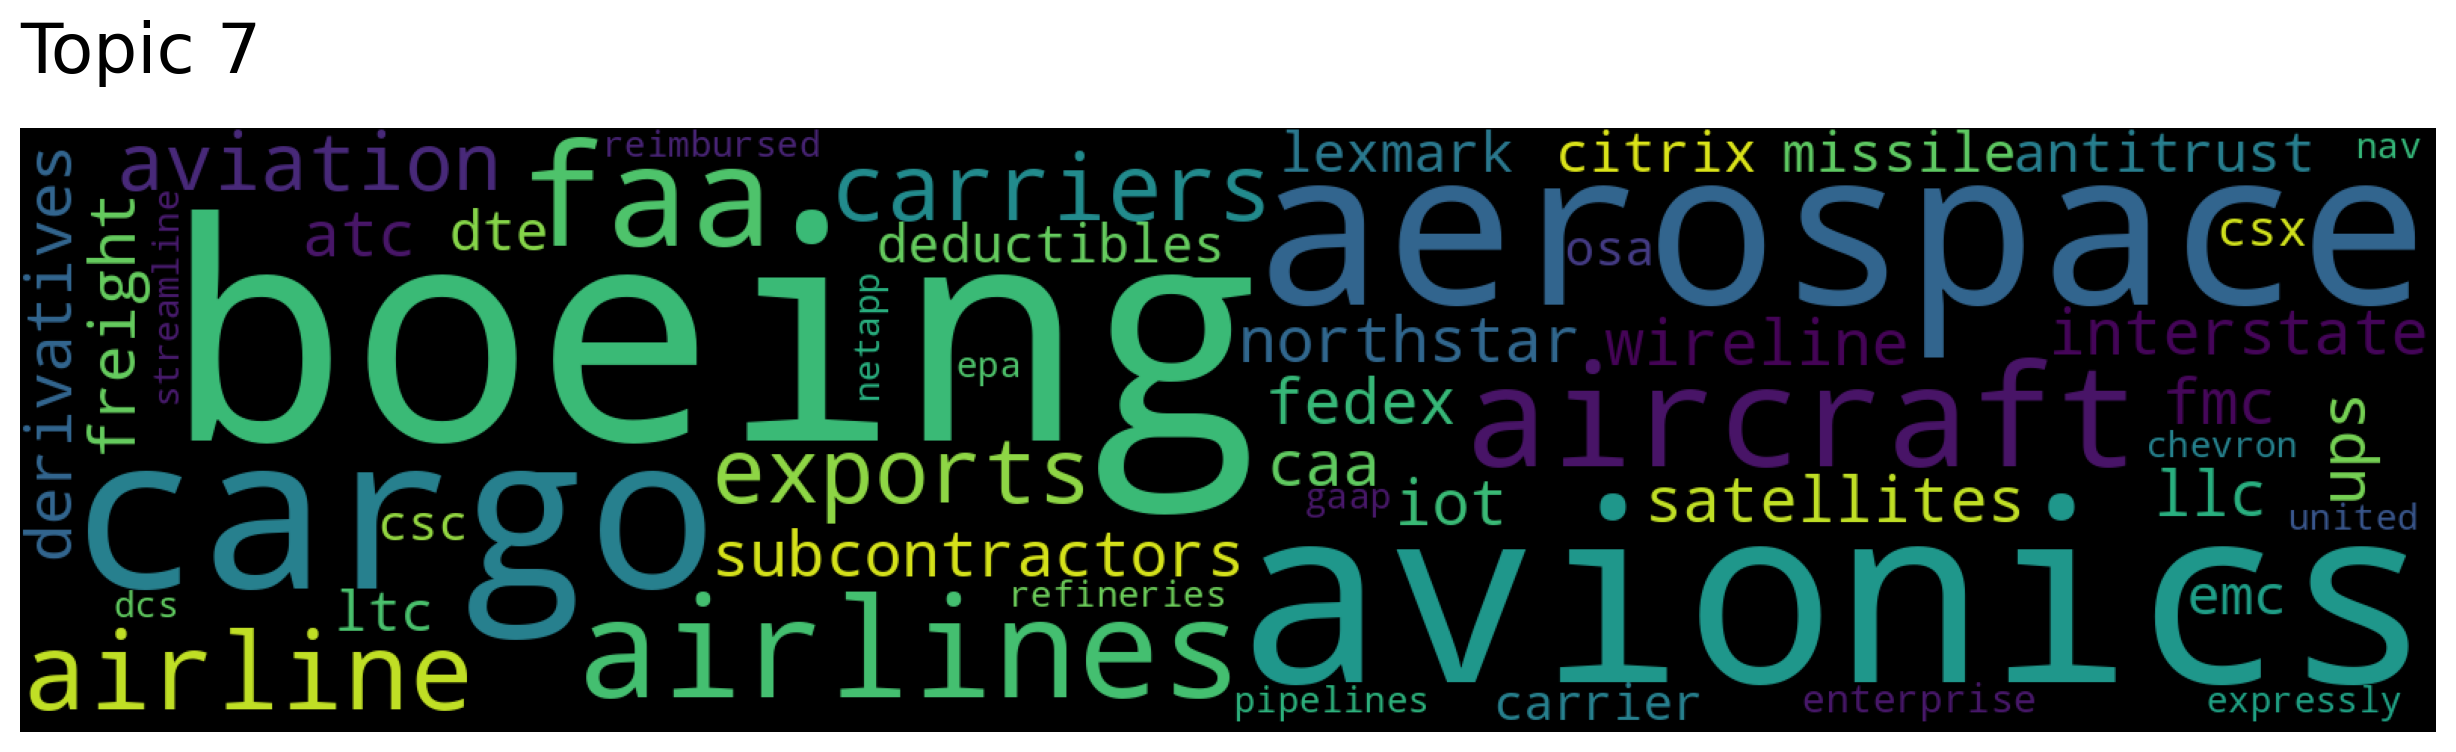

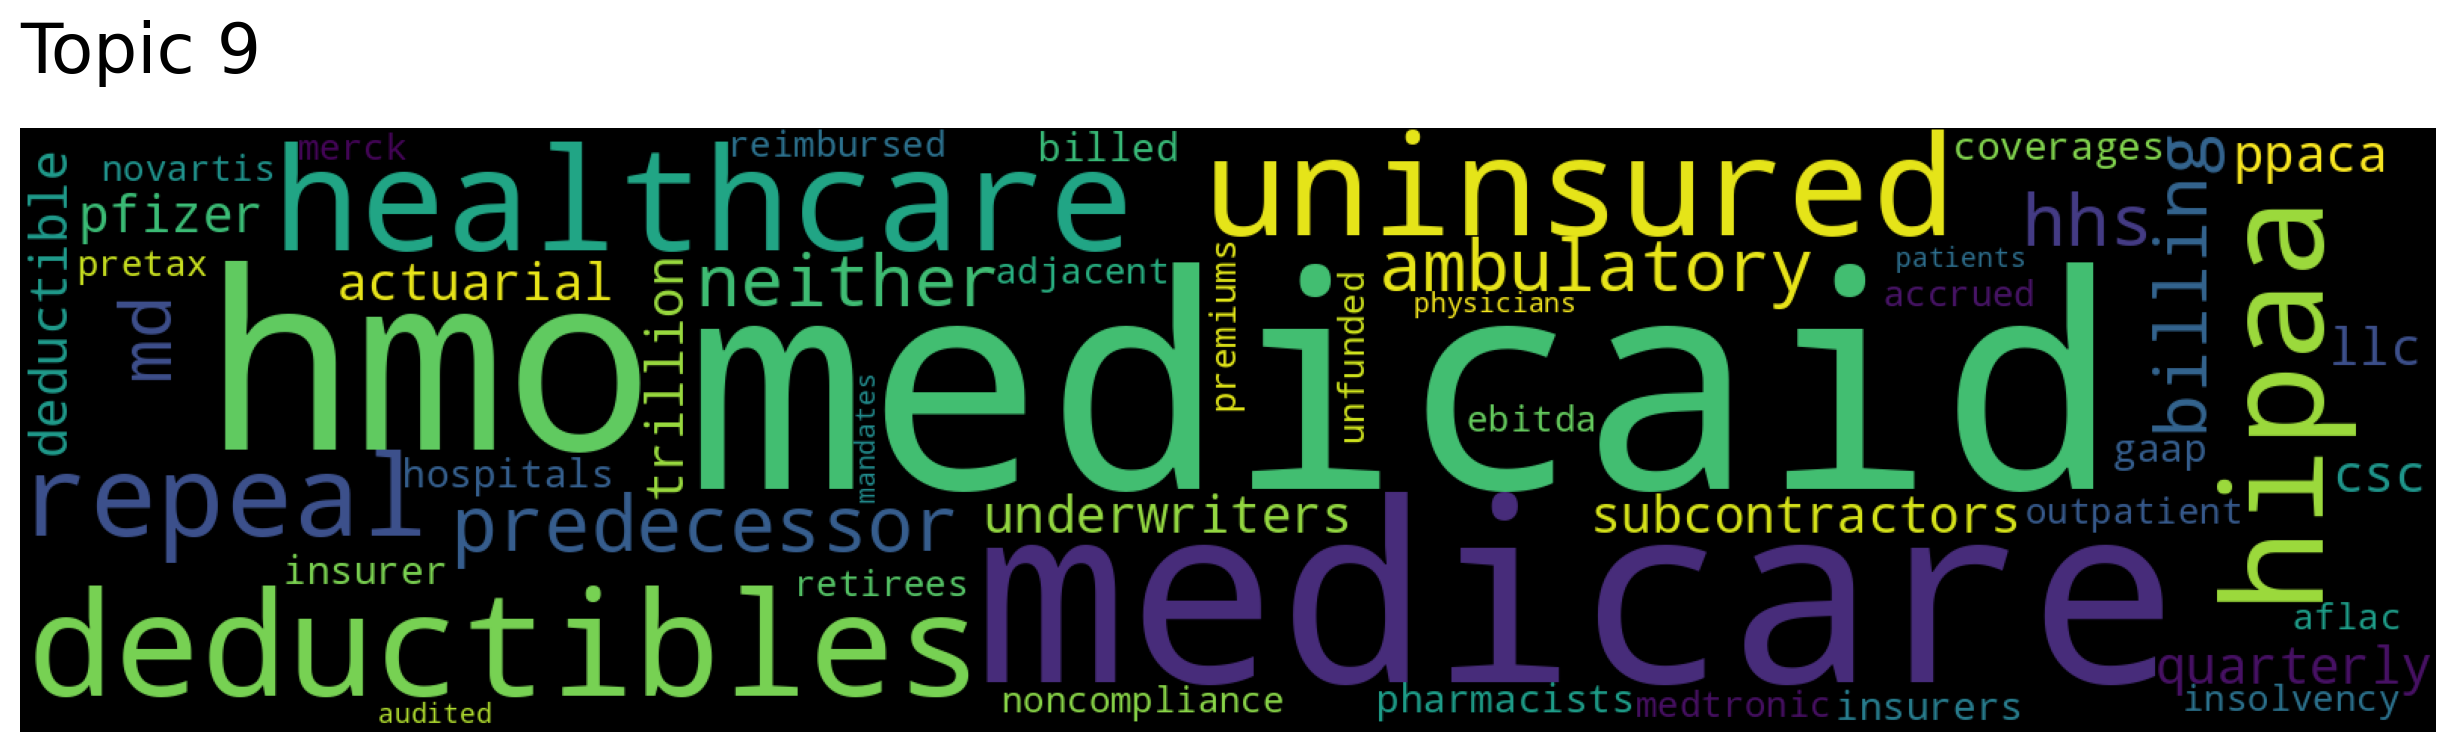

In [7]:
# topic words visualised
for i in topics.topic_num:
    model.generate_topic_wordcloud(i)

In [8]:
# export
# save_pkl(model, 'model')
save_pkl(doc_topics, 'doc_topics')
save_pkl(topics, 'topics')